<H1> KAGGLE DATA - "Airplane Crashes and Fatalities Since 1908" </H1>

<b> This ipython notebook provides the Analysis of the public dataset: "Airplane Crashes and Fatalities Since 1908" (Full history of airplane crashes throughout the world, from 1908-present) hosted by Open Data by Socrata available in Kaggle.com 

It answers various questions like:

Yearly how many planes crashed? how many people were on board? how many survived? how many died?

Highest number of crashes by operator and Type of aircrafts.

‘Summary’ field has the details about the crashes. Find the reasons of the crash and categorize them in different clusters i.e Fire, shot down, weather (for the ‘Blanks’ in the data category can be UNKNOWN) you are open to make clusters of your choice but they should not exceed 7.

Find the number of crashed aircrafts and number of deaths against each category from above step.

Find any interesting trends/behaviors that you encounter when you analyze the dataset. </b>



In [57]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [63]:
df = pd.read_csv("Airplane.csv")

<b> Data Cleaning: </b>

In [59]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,7/12/1912,6:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [60]:
df.describe()

C:\Users\harini.devulapalli\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,644.000000,583.000000,2750.000000


In [61]:
df.fillna(0, axis=1, inplace = True)

In [70]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month

<b> 1) Yearly how many planes crashed? </b>

In [64]:
dates_only = df[['Date']]
grouped = dates_only.groupby(lambda x: dates_only['Date'][x].split('/')[2]).count()

In [68]:
grouped.tail(5)

,Date
2005,51
2006,49
2007,54
2008,62
2009,24


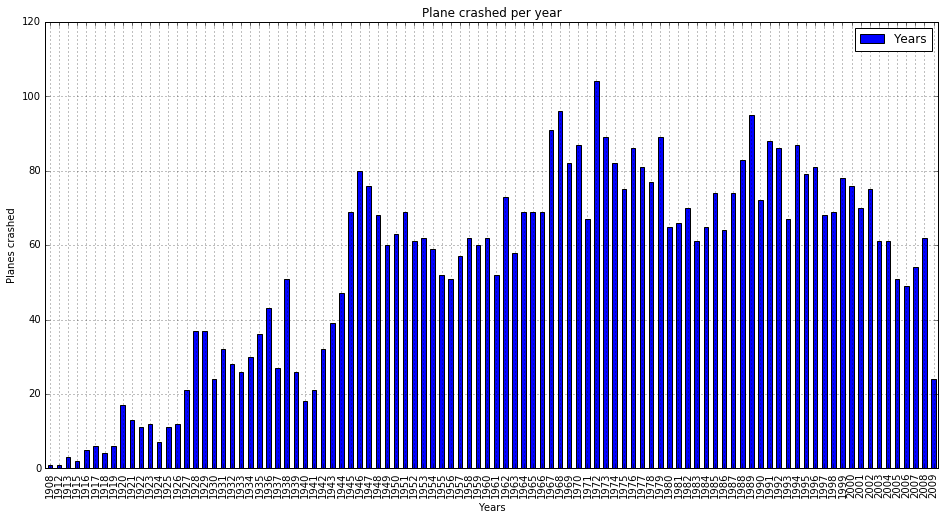

In [66]:
plot_year = grouped.plot(kind='bar', grid=True, by=grouped, title="Plane crashed per year", figsize=(16, 8 ), )
plot_year.set_ylabel("Planes crashed")
plot_year.set_xlabel("Years")
plot_year.legend(["Years"])

<b> 2) how many died? </b>

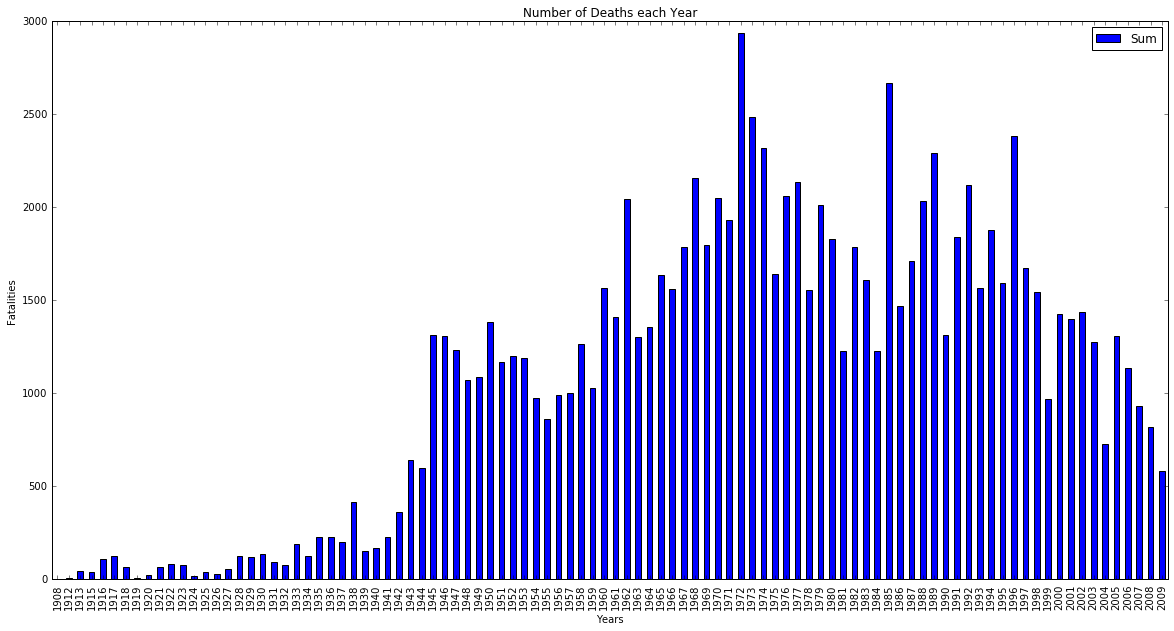

In [78]:
FYear  = df[u'Fatalities'].groupby(df['year'])
Total_Fyear =FYear.sum()
plt.figure(figsize=(20,10))
my_plot = Total_Fyear.plot(kind='bar')
plt.title("Number of Deaths each Year")
my_plot.set_ylabel("Fatalities")
my_plot.set_xlabel("Years")
my_plot.legend(["Sum"])

<b> how many people were on board? </b>

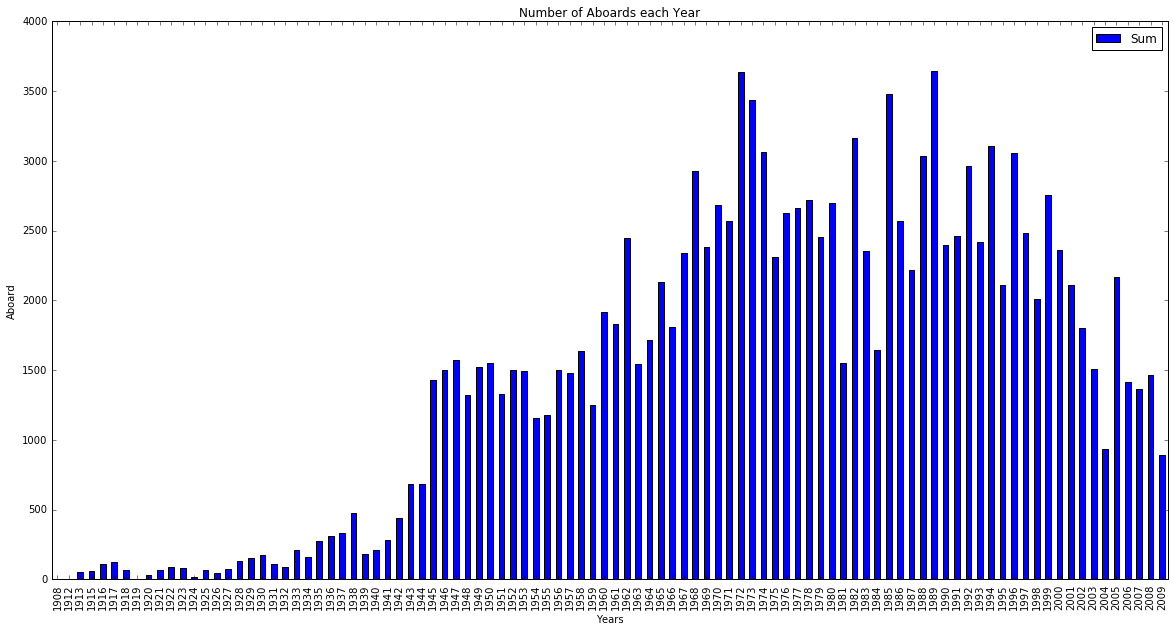

In [77]:
AYear  = df[u'Aboard'].groupby(df['year'])
Total_Ayear =AYear.sum()
plt.figure(figsize=(20,10))
my_plot = Total_Ayear.plot(kind='bar')
plt.title("Number of Aboards each Year")
my_plot.set_ylabel("Aboard")
my_plot.set_xlabel("Years")
my_plot.legend(["Sum"])

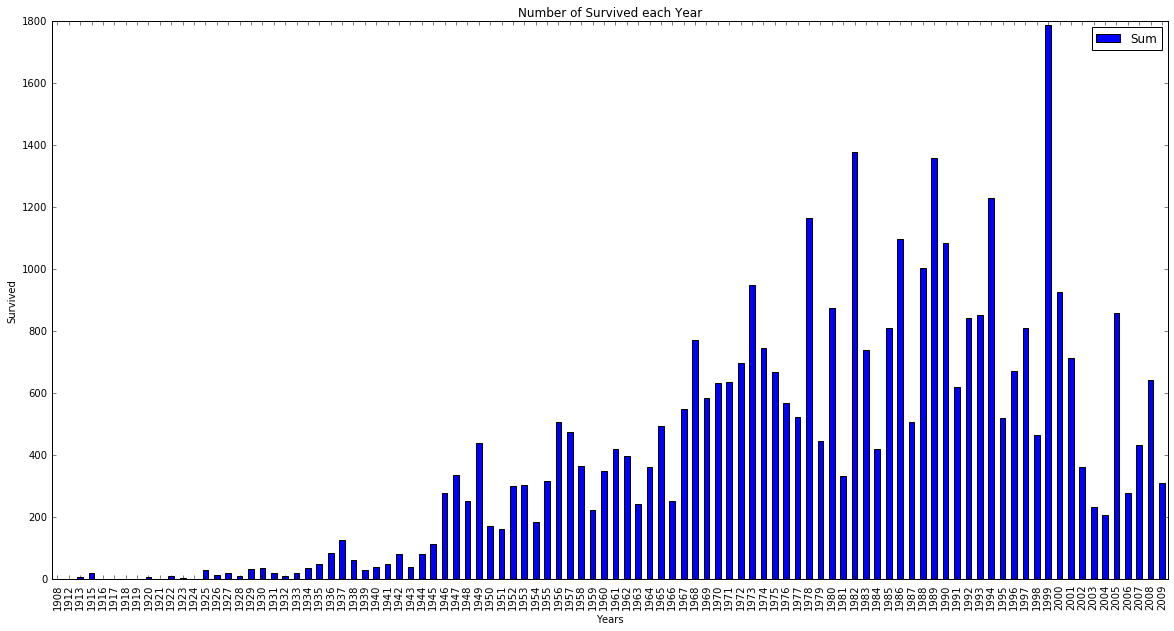

In [76]:
df[u'Survived'] = df[u'Aboard'] -  df[u'Fatalities']
GYear  = df[u'Survived'].groupby(df['year'])
Total_Gyear =GYear.sum()
plt.figure(figsize=(20,10))
my_plot = Total_Gyear.plot(kind='bar')
plt.title("Number of Survived each Year")
my_plot.set_ylabel("Survived")
my_plot.set_xlabel("Years")
my_plot.legend(["Sum"])

<b> Pearson Test for Linear Correlation b/w Aboard and Fatalities. </b>

In [11]:
from scipy.stats import pearsonr
pearsonr(df['Aboard'],df['Fatalities'])

(0.75692422872266041, 0.0)

<b> Results of Pearson's Test: This test is conducted to check for linear correlation between abraod and Fatalities!
From the 1st value in tuple we can see that there is a positive correlation because the value is postive and this is called Pearson's Coeeficient value. If the Coeff value is betweeen 0 and 1 then there is a postive corr between the varaibles and if its 0 and -1 then the relation is negative! Also the p-value is far greater than 0.005 hence it clearly justifies a postive correlation </b>

<b> Pearson Test for Linear Correlation b/w Survived and Fatalities. </b>

In [12]:
from scipy.stats import pearsonr
pearsonr(df[u'Fatalities'],df[u'Survived'])

(-0.021707843303172044, 0.11516680501957141)

<b> Operators and the number of deaths related to them </b>

In [84]:
FOp  = df[u'Fatalities'].groupby(df[u'Operator'])
Total_FOp =FOp.sum()
Total_FOp = pd.DataFrame(Total_FOp)
Dangerous_Operators=Total_FOp.sort('Fatalities', axis=0, ascending =False)
Dangerous_Operators.head()

C:\Users\harini.devulapalli\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Fatalities
Operator,
Aeroflot,7156.0
Military - U.S. Air Force,3717.0
Air France,1734.0
American Airlines,1421.0
Pan American World Airways,1302.0


<b> Types and the number of deaths related to them </b>

In [14]:
FTy  = df[u'Fatalities'].groupby(df[u'Type'])
Total_FTy =FTy.sum()
Total_FTy = pd.DataFrame(Total_FTy)
Dangerous_Types=Total_FTy.sort('Fatalities', axis=0, ascending =False)
Dangerous_Types.head()

C:\Users\harini.devulapalli\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Fatalities
Type,
Douglas DC-3,4793.0
Antonov AN-26,1068.0
Douglas DC-6B,1055.0
Douglas C-47,1046.0
McDonnell Douglas DC-9-32,951.0


<b> Cluster Analysis:

‘Summary’ field has the details about the crashes. Find the reasons of the crash and categorize them in different clusters i.e Fire, shot down, weather (for the ‘Blanks’ in the data category can be UNKNOWN) you are open to make clusters of your choice but they should not exceed 7.</b>

In [86]:
data = pd.read_csv("3-Airplane_Crashes_Since_1908.txt" ,sep=',')
data.fillna(0, axis=1, inplace = True)
data["Summary"].replace(0,"Unknown" , inplace=True)
documents = data['Summary'].unique()
documents = documents.tolist()

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

In [88]:
true_k = 10
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=10, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [89]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print "Cluster %d:" % i,
    for ind in order_centroids[i, :10]:
        print ' %s' % terms[ind],
    print

Top terms per cluster:
Cluster 0:  landing  emergency  runway  crashed  plane  attempt  gear  aircraft  make  engine
Cluster 1:  crashed  aircraft  plane  mountain  flight  pilot  ft  shot  struck  killed
Cluster 2:  weather  conditions  vfr  adverse  flight  continued  poor  mountain  pilot  crashed
Cluster 3:  taking  shortly  crashed  minutes  engine  plane  aircraft  airport  lost  failure
Cluster 4:  aircraft  control  engine  loss  failure  flight  wing  left  plane  pilot
Cluster 5:  land  attempting  crashed  plane  runway  fog  airport  struck  trees  heavy
Cluster 6:  en  route  crashed  disappeared  mountain  plane  cargo  mountains  aircraft  wreckage
Cluster 7:  approach  runway  short  crashed  aircraft  pilot  crew  final  fog  altitude
Cluster 8:  cargo  plane  crashed  struck  runway  mountain  approach  altitude  lost  engine
Cluster 9:  takeoff  engine  crashed  failure  aircraft  shortly  plane  runway  failed  experiencing


<b> Find the number of crashed aircrafts and number of deaths against each category from above step </b>

causes not avaiable: 5268
unindentified causes: 3709
('engine failure', 420)
('poor weather', 416)
('stall', 271)
('pilot error', 152)
('shot down', 133)
('turbulence', 117)
('on fire', 116)
('fuel exhaustion', 71)
('electrical problem', 41)
('structure failure', 39)
('terrorism', 12)


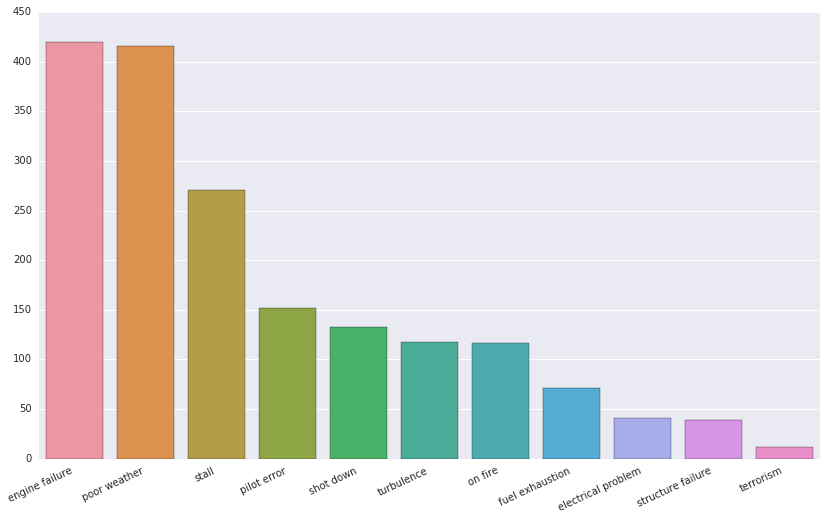

In [82]:
import seaborn as sns

import re
import operator
failures = {
    'pilot error': '(pilot|crew) (error|fatigue)',
    'engine failure': 'engine.*(fire|fail)',
    'structure failure': '(structural fail)|(fuel leak)|(langing gear)',
    'electrical problem': 'electrical',
    'poor weather': '((poor|bad).*(weather|visibility)|thunderstorm)',
    'stall': 'stall',
    'on fire': '(caught fire)|(caught on fire)',
    'turbulence': 'turbulence',
    'fuel exhaustion': '(out of fuel)|(fuel.*exhaust)',
    'terrorism': 'terrorist|terrorism',
    'shot down': 'shot down',
}

failure_counts = {'other':0}

for s in data.Summary.dropna():
    other = True
    for failure, exp in failures.items():
        if re.search(exp, s.lower()):
            other = False
            if failure in failure_counts:
                failure_counts[failure] += 1
            else:
                failure_counts[failure] = 1
    if other:
        failure_counts['other'] += 1

nan_counts = len(data.Summary.isnull())
print('causes not avaiable: %d' % nan_counts)
print('unindentified causes: %d' % failure_counts['other'])

del failure_counts['other']

sortedcauses = sorted(failure_counts.items(), key=operator.itemgetter(1), reverse=True)
for k, v in sortedcauses:
    print(k, v)

plt.figure(figsize=(14, 8))
x, y = zip(*sortedcauses)
sns.barplot(x=x, y=y)
plt.xticks(rotation=25, horizontalalignment='right')
plt.show()

<b> Text Analysis using LDA </b>

In [41]:
summary = data['Summary'].tolist()
punctuation = ['.', ',', ':']
texts = []

for text in summary:
    cleaned_text = str(text).lower()   
    for mark in punctuation:
        cleaned_text = cleaned_text.replace(mark, '')       
    texts.append(cleaned_text.split())

In [42]:
from gensim import corpora, models

from collections import Counter
dictionary = corpora.Dictionary(texts)

In [43]:
word_list = []
for key, value in dictionary.dfs.items():
    if value > 100:
        word_list.append(key)

In [44]:

dictionary.filter_tokens(word_list)
corpus = [dictionary.doc2bow(text) for text in texts]

In [45]:
np.random.seed(76543)
lda = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=5)

In [47]:

topics = lda.show_topics(num_topics=10, num_words=15, formatted=False)
for topic in topics:
    print('Topic %d:' % topic[0])
    for pair in topic[1]:
        print(pair[0])
    print()


Topic 0:
door
problems
spatial
disorientation
rate
holding
officer
forest
pattern
maintenance
lake
autopilot
descending
thrust
missile
()
Topic 1:
went
dive
steep
1
positioning
planning
weight
rebels
entered
passengers
building
possible
maximum
use
rotor
()
Topic 2:
windshear
thunderstorm
missed
experiencing
management
wooded
remote
investigation
skidded
light
tail
oil
rotor
destroyed
mountainside
()
Topic 3:
propeller
clearance
impacted
side
maintenance
following
nose
attitude
fence
ditched
mountainous
ocean
fly
winds
just
()
Topic 4:
river
km
without
disappeared
atc
they
their
radar
equipment
30
decided
5
south
adequate
later
()
Topic 5:
carrying
gain
thrust
included
jungle
subsequent
returning
device
detonation
end
another
radar
departure
clouds
cabin
()
Topic 6:
mile
exploded
they
follow
cockpit
international
jet
side
airliner
operating
aborted
three
end
been
could
()
Topic 7:
later
they
four
tower
tried
copilot
meteorological
carrying
midair
cessna
passengers
between
overloaded
fi

<b> Useless Code </b>

In [ ]:
plt.figure(figsize=(20,10))
df.plot(x="Aboard",y="Fatalities")

In [ ]:
plt.figure(figsize=(20,10))
x,y = [],[]
x.append (df.Aboard)
y.append (df.Fatalities)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y,x,'o-')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Aboard'], df['Fatalities'])

In [ ]:
df.plot(x='Aboard', y='Fatalities', marker='.')